# Customer Segmentation on Mall Customers Data

In [91]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [66]:
data = pd.read_csv("../dataset/Mall_Customers.csv")
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [67]:
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
165,166,Female,36,85,75
26,27,Female,45,28,32
90,91,Female,68,59,55
52,53,Female,31,43,54
114,115,Female,18,65,48
101,102,Female,49,62,48
193,194,Female,38,113,91
78,79,Female,23,54,52
84,85,Female,21,54,57
23,24,Male,31,25,73


In [68]:
data.shape

(200, 5)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
data.duplicated().sum()

np.int64(0)

In [71]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [72]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [73]:
data["Spending Score (1-100)"].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [74]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [75]:
data["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [76]:
gender_counts = data["Gender"].value_counts()
gender_percentage = data["Gender"].value_counts(normalize=True) * 100
print(gender_percentage)

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


In [77]:
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
88,89,Female,34,58,60
151,152,Male,39,78,88
31,32,Female,21,30,73
47,48,Female,27,40,47
61,62,Male,19,46,55
148,149,Female,34,78,22
69,70,Female,32,48,47
108,109,Male,68,63,43
49,50,Female,31,40,42
53,54,Male,59,43,60


In [78]:
# dropping the unnecessary column CustomerID
data = data.drop("CustomerID", axis=1)
data.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
45,Female,24,39,65
191,Female,32,103,69
110,Male,65,63,52
153,Female,38,78,76
64,Male,63,48,51
4,Female,31,17,40
156,Male,37,78,1
53,Male,59,43,60
39,Female,20,37,75
177,Male,27,88,69


In [79]:
data["Gender"] = data["Gender"].replace(
    {
        "Male": 0,
        "Female": 1
    }
)
data.sample(10)

/tmp/ipykernel_17452/3435293700.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"] = data["Gender"].replace(


,Gender,Age,Annual Income (k$),Spending Score (1-100)
57,0,69,44,46
146,0,48,77,36
95,0,24,60,52
194,1,47,120,16
105,1,21,62,42
137,0,32,73,73
84,1,21,54,57
189,1,36,103,85
27,0,35,28,61
86,1,55,57,58


In [80]:
data["Gender"].value_counts()

Gender
1    112
0     88
Name: count, dtype: int64

In [81]:
data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


In [82]:
# scaling the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [83]:
print(X_scaled)

[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [ 0.88640526 -1.20926872 -1.66266033  1.00159627]
 [ 0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [ 0.88640526 -1.13750203 -1.62449091  1.70038436]
 [-1.12815215  1.80493225 -1.58632148 -1.83237767]
 [ 0.88640526 -0.6351352  -1.58632148  0.84631002]
 [-1.12815215  2.02023231 -1.58632148 -1.4053405 ]
 [ 0.88640526 -0.27630176 -1.58632148  1.89449216]
 [ 0.88640526  1.37433211 -1.54815205 -1.36651894]
 [ 0.88640526 -1.06573534 -1.54815205  1.04041783]
 [-1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [-1.12815215 -1.20926872 -1.54815205  1.11806095]
 [ 0.88640526 -0.27630176 -1.50998262 -0.59008772]
 [-1.12815215 -1.3528021  -1.50998262  0.61338066]
 [-1.12815215  0.94373197 -1.43364376 -0.82301709]
 [ 0.88640526 -0.27630176 -1.43

In [84]:
# choosing the number of clusters using the elbow method
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        random_state=21,
        n_init=10
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

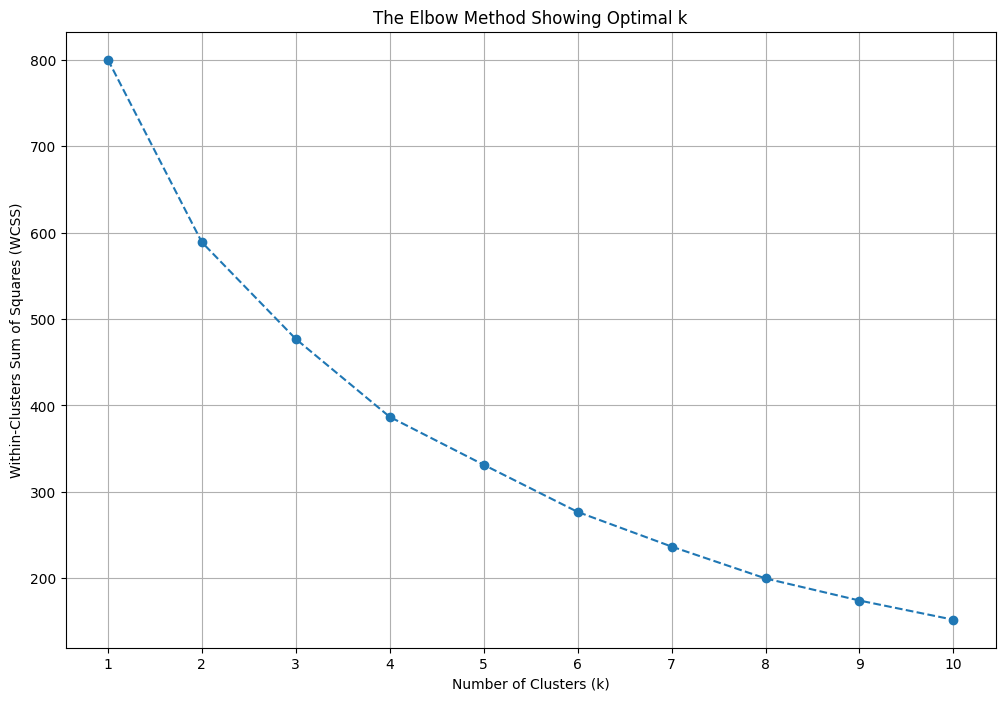

In [85]:
# plotting the elbow curve
plt.figure(figsize=(12, 8))
plt.plot(
    k_range,
    wcss,
    marker= "o",
    linestyle="--"
)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Clusters Sum of Squares (WCSS)")
plt.title("The Elbow Method Showing Optimal k")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [88]:
# fitting with the optimal k
opt_k = 4
kmeans = KMeans(
    n_clusters=opt_k,
    init="k-means++",
    random_state=21,
    n_init=10
)
kmeans.fit(X_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,21
,copy_x,True
,algorithm,'lloyd'


In [89]:
# customer clusters
cluster_labels = kmeans.labels_
data["Clusters"] = cluster_labels
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,3
3,1,23,16,77,1
4,1,31,17,40,1
5,1,22,17,76,1
6,1,35,18,6,3
7,1,23,18,94,1
8,0,64,19,3,2
9,1,30,19,72,1


In [90]:
data["Clusters"].value_counts()

Clusters
1    57
3    55
2    48
0    40
Name: count, dtype: int64

In [92]:
# Visualize the clusters using PCA for 2D projection
pca = PCA(n_components=2)
x_pca = pca.fit(X_scaled)


In [ ]:
# dataframe for pca results and other cluster labels
